In [1]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
!sshpass -p wang2024 ssh wpy@172.16.10.103 "mamba run -n gsea python ~/stereoseq/20240502-SPACseq/enrich.py"

Gene               object
Log2FoldChange    float64
padj              float64
score             float64
Cluster             int64
dtype: object
/home/wpy/stereoseq/20240502-SPACseq/bin/go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms
Enrichment analysis for list 0 completed successfully: 268
Enrichment analysis for list 1 completed successfully: 139
Enrichment analysis for list 2 completed successfully: 230
Enrichment analysis for list 3 completed successfully: 312
Enrichment analysis for list 4 completed successfully: 192
Enrichment analysis for list 5 completed successfully: 102
Enrichment analysis for list 6 completed successfully: 259
Enrichment analysis for list 7 completed successfully: 260
Enrichment analysis for list 8 completed successfully: 170
Enrichment analysis for list 9 completed successfully: 90
Enrichment analysis for list 10 completed successfully: 190
Enrichment analysis for list 11 completed successfully: 260



In [3]:
for i in range(11):
    enr = pd.read_csv(f"~/stereoseq/20240502-SPACseq/GO/Cluster_{i}.result", sep="\t")
    results = enr.sort_values(by='Combined Score', ascending=False)
    results = results[results["Adjusted P-value"] < 0.1]
    results = results.loc[:, ["Term", "Genes", "Adjusted P-value"]]
    results["Cluster"] = i
    results["Gene Counts"] = results["Genes"].str.split(";").apply(len)
    results["Term"] = results["Term"].str.split("R-HSA").str[0]
    results = results.groupby("Cluster", as_index=False).apply(lambda x: x.sort_values(by='Adjusted P-value')).reset_index(drop=True)
    if not i: go_df = results
    else: go_df = pd.concat([go_df, results], axis=0)
#go_df.to_csv('~/stereoseq/20240502-SPACseq/GO/Reactome.csv', index=None, sep='\t')
go_df

/tmp/ipykernel_526/190549614.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = results.groupby("Cluster", as_index=False).apply(lambda x: x.sort_values(by='Adjusted P-value')).reset_index(drop=True)
/tmp/ipykernel_526/190549614.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = results.groupby("Cluster", as_index=False).apply(lambda x: x.sort_values(by='Adjusted P-value')).reset_index

,Term,Genes,Adjusted P-value,Cluster,Gene Counts
0,NOTCH1 Intracellular Domain Regulates Transcri...,CDK8;MAML2;NBEA;MAML3,0.001662,0,4
1,Signaling By NOTCH1,CDK8;MAML2;NBEA;MAML3,0.004684,0,4
2,RHOV GTPase Cycle,DST;USP9X;PEAK1,0.008035,0,3
3,RHOU GTPase Cycle,DST;USP9X;PEAK1,0.008035,0,3
4,Signaling By NOTCH,CDK8;MAML2;NBEA;MAML3;TNRC6B,0.008035,0,5
...,...,...,...,...,...
26,Synthesis Of Lipoxins (LX),ALOX5AP,0.091373,10,1
27,Fatty Acid Cycling Model,UCP2,0.091373,10,1
28,Cellular Response To Chemical Stress,CYBB;HMOX1;CYBA,0.091373,10,3
29,Peptide Ligand-Binding Receptors,CCL5;C3AR1;CXCL16,0.091373,10,3


/tmp/ipykernel_526/3355942648.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipykernel_526/3355942648.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipykernel_526/3355942648.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipykernel_526/3355942648.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipykernel_526/33559

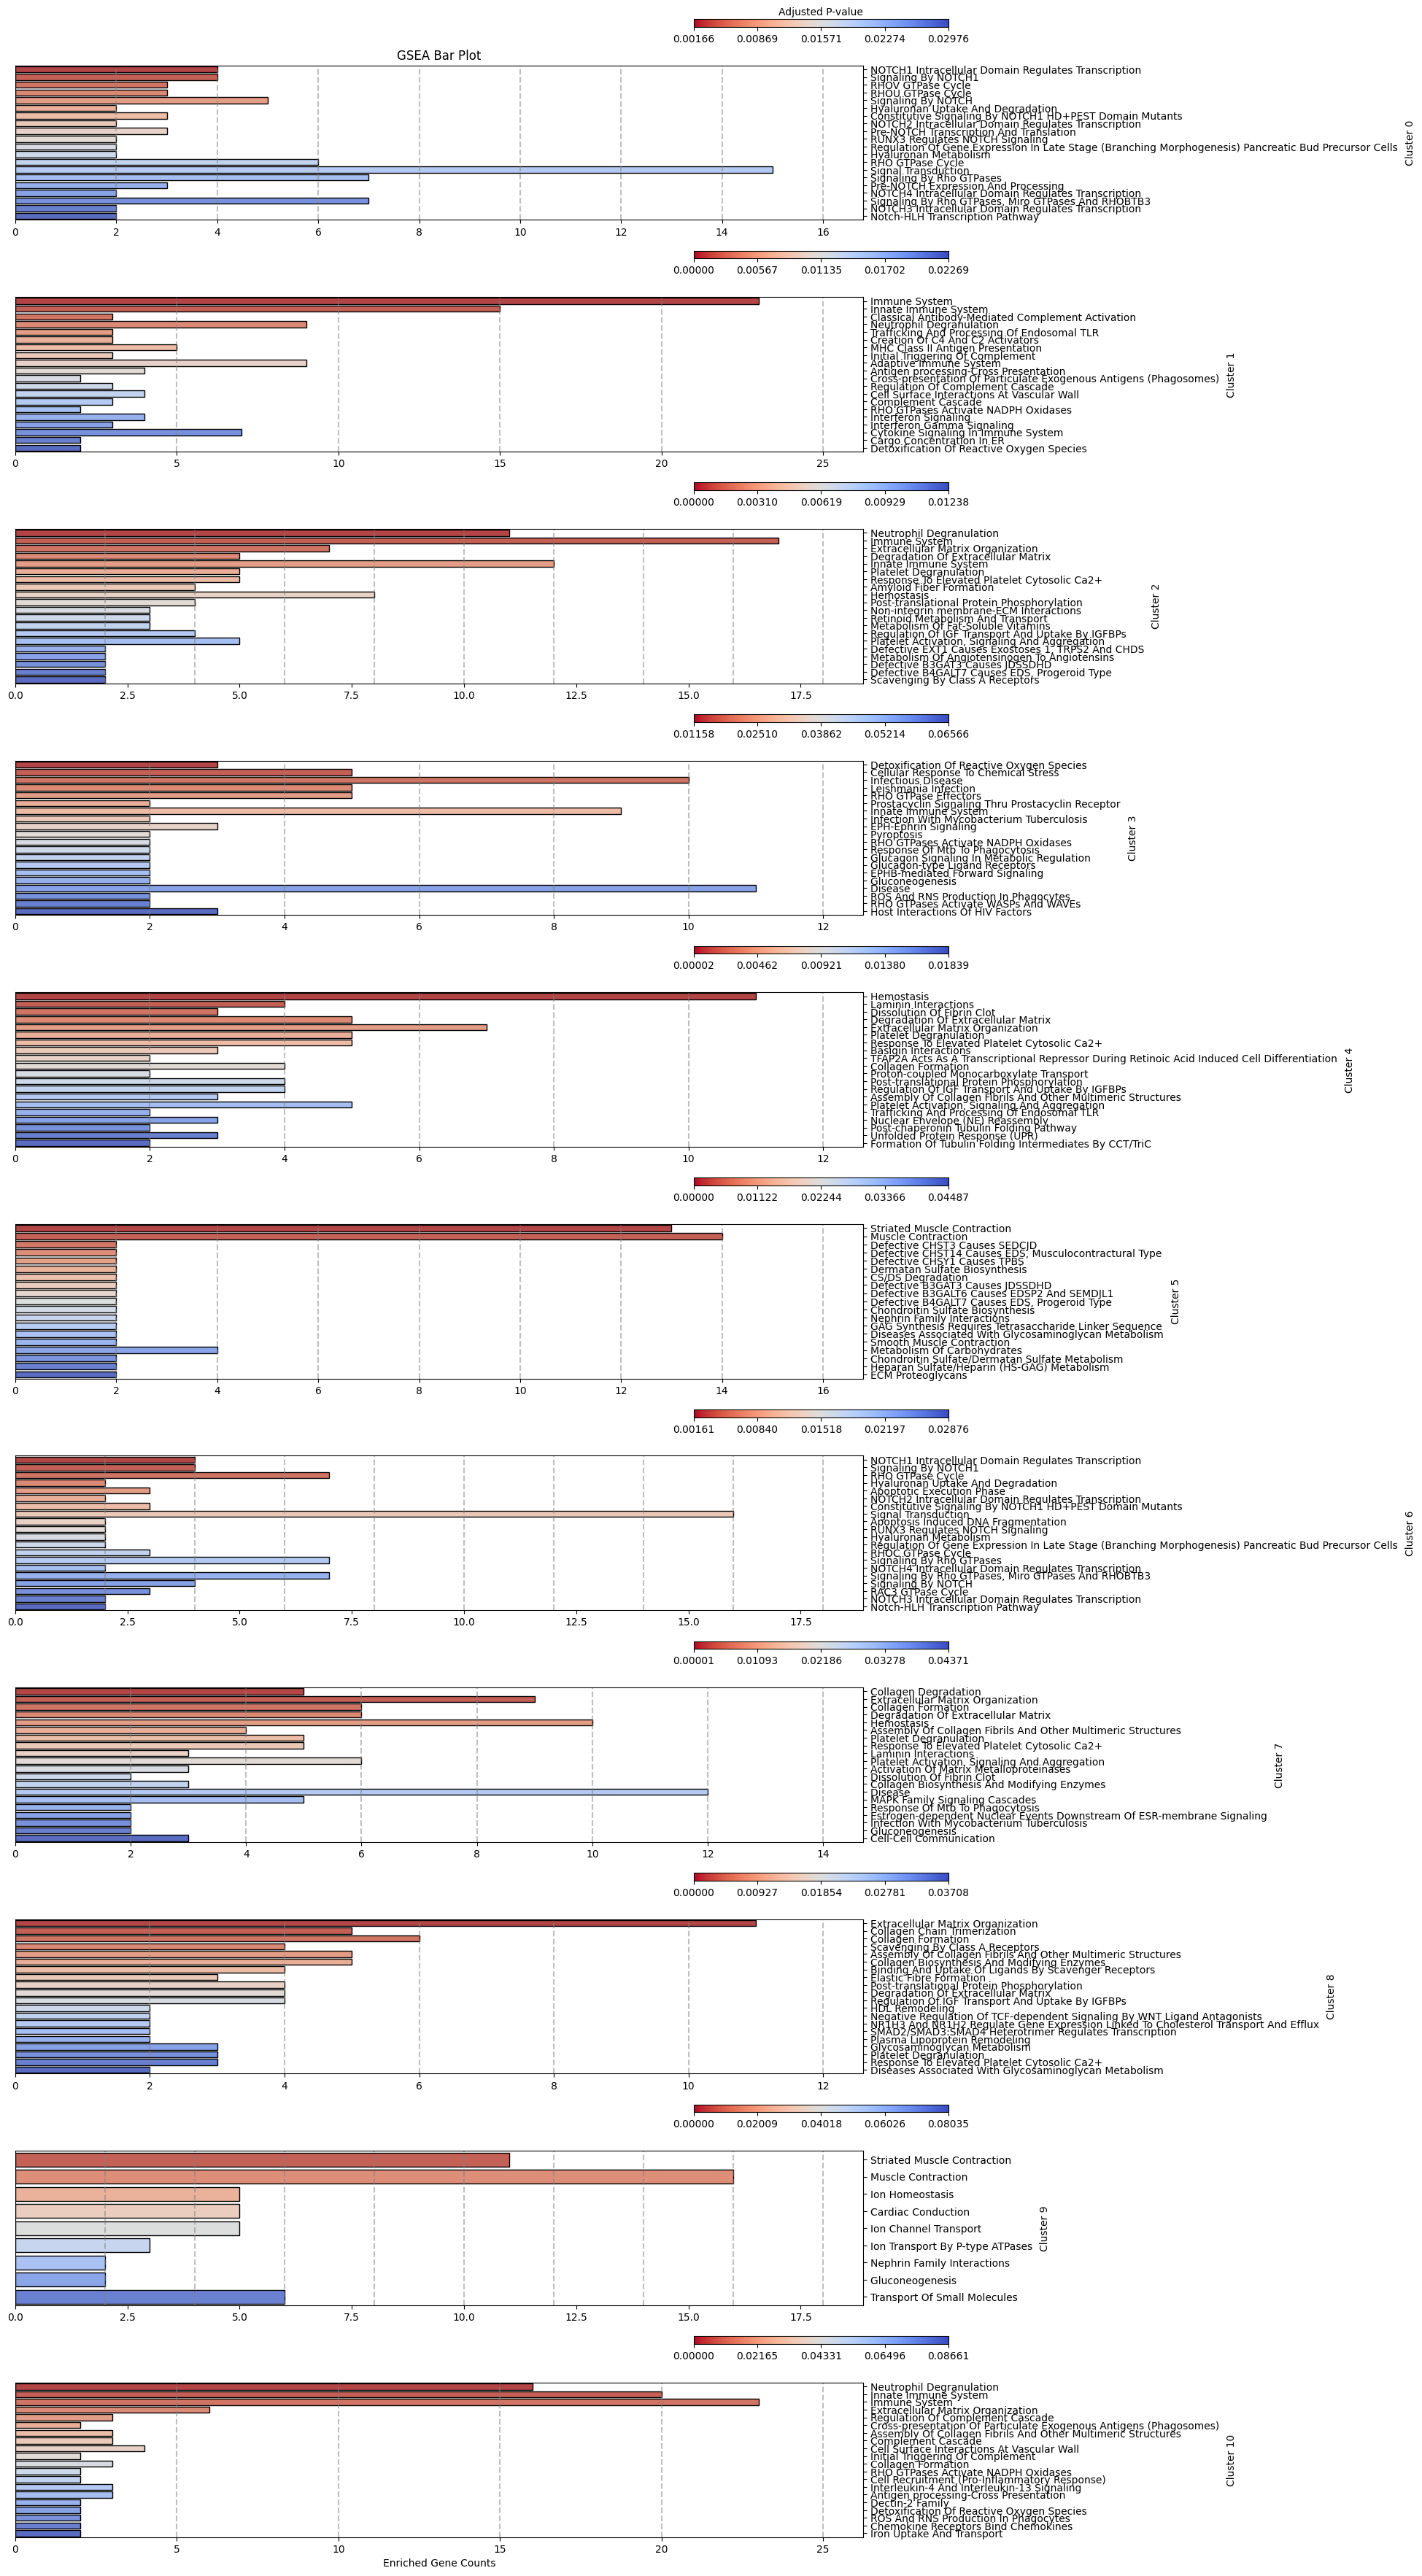

In [5]:
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(11, 1, figsize=(15, 44))
for cluster in range(11):
    gsea_results = go_df[go_df["Cluster"] == cluster][:20]

    barplot = sns.barplot(
        x='Gene Counts', 
        y='Term', 
        data=gsea_results, 
        palette="coolwarm_r",
        edgecolor='black',
        ax=ax[cluster]
    )
    for tick in ax[cluster].get_xticks():
        ax[cluster].axvline(x=tick, linestyle='--', color='gray', alpha=0.5)

    norm = plt.Normalize(gsea_results['Adjusted P-value'].min(), gsea_results['Adjusted P-value'].max())
    sm = plt.cm.ScalarMappable(cmap="coolwarm_r", norm=norm)
    sm.set_array([])
    cax = inset_axes(ax[cluster], width="30%", height="5%", loc='upper right',
                     bbox_to_anchor=(0.1, 0.3, 1, 1), bbox_transform=ax[cluster].transAxes, borderpad=0)
    if cluster == 0:
        cbar = fig.colorbar(sm, cax=cax, label="Adjusted P-value", orientation='horizontal', shrink=0.1)
        cbar.ax.xaxis.set_label_position('top')
    else: cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', shrink=0.1)

    cbar_ticks = np.linspace(gsea_results['Adjusted P-value'].min(), gsea_results['Adjusted P-value'].max(), num=5)  # Adjust num for density
    cbar.set_ticks(cbar_ticks)
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

    ax[cluster].yaxis.tick_right()
    ax[cluster].yaxis.set_label_position('right')

    ax[cluster].set_xlabel('')
    ax[cluster].set_ylabel(f'Cluster {cluster}')

plt.subplots_adjust(hspace=0.5)
ax[0].set_title('GSEA Bar Plot')
ax[10].set_xlabel('Enriched Gene Counts')
plt.show()